In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
def heav(x,f):
    if x >= f:
        return f
    elif x >= 0:
        return x*0.5
    else :
        return 0

heav_=np.frompyfunc(heav,2,1,)

In [10]:
a=np.array([1,2,3,4,-2,5])
heav_([5,3,1,2],2)

array([2, 2, 0.5, 2], dtype=object)

In [11]:
a=np.array([[1,2],[1,5]])
b=np.array([1,10])
a/a.sum(axis=1).reshape(a.shape[0],1)

array([[0.33333333, 0.66666667],
       [0.16666667, 0.83333333]])

## factory model

In [206]:
Num=100
D=np.ones(Num)*2
D=np.random.rand(Num)

def factory_gen(D,Num,days=100,exp=1):
    # 设置初始状态列表 Salary, Consumption, Investment, Deposits
    S=np.ones(Num)*1.000
    C=np.ones(Num)*1
    interest=0.1
    I=D+S-C
    Ds=[]
    Fs=[]
    cash=0+I.sum() # factory 的 cash
    netR=cash*interest # 收益

    R=np.ones(Num)*0
    # R=netR*0.5*I/I.sum() # 收益的一半拿去分配
    # cash+=netR*0.5 # 收益的另一半拿去 cash 中
    Ds.append(D.copy())
    Fs.append(cash)
    for day in range(days):
        add=S-C+R
        D+=add

        I=D
        # cash+=(add).sum() # 新的投资
        netR=cash*interest
        R=netR*0.5*(I**exp)/(I**exp).sum()
        # np.random.shuffle(R)
        # R=netR*0.5*np.ones(Num)/Num
        cash+=netR*0.5 + (add).sum() # 资产增值

        C=np.ones(Num)*1+heav_(R,R.mean()).astype(float) # 消费主义的陷阱
        # C=np.ones(Num)*1+R*0.5 # 消费主义的陷阱
        # C=np.ones(Num)*1+(R**1)/(R**1).sum()
        # C=np.ones(Num)*1
        Ds.append(D.copy())
        Fs.append(cash)

    return np.array(Ds),np.array(Fs)

def wealth_cum(Ws):
    Ws=np.sort(Ws)/np.sum(Ws)
    ws_cum=[Ws[i:].sum() for i in range(len(Ws))]
    return ws_cum

def cal_an(a,b,l):
    an=[a,b,]
    for i in range(l):
        c=b*(1+0.05)+a*0.05
        an.append(c)
        a,b=b,c
    return np.array(an)


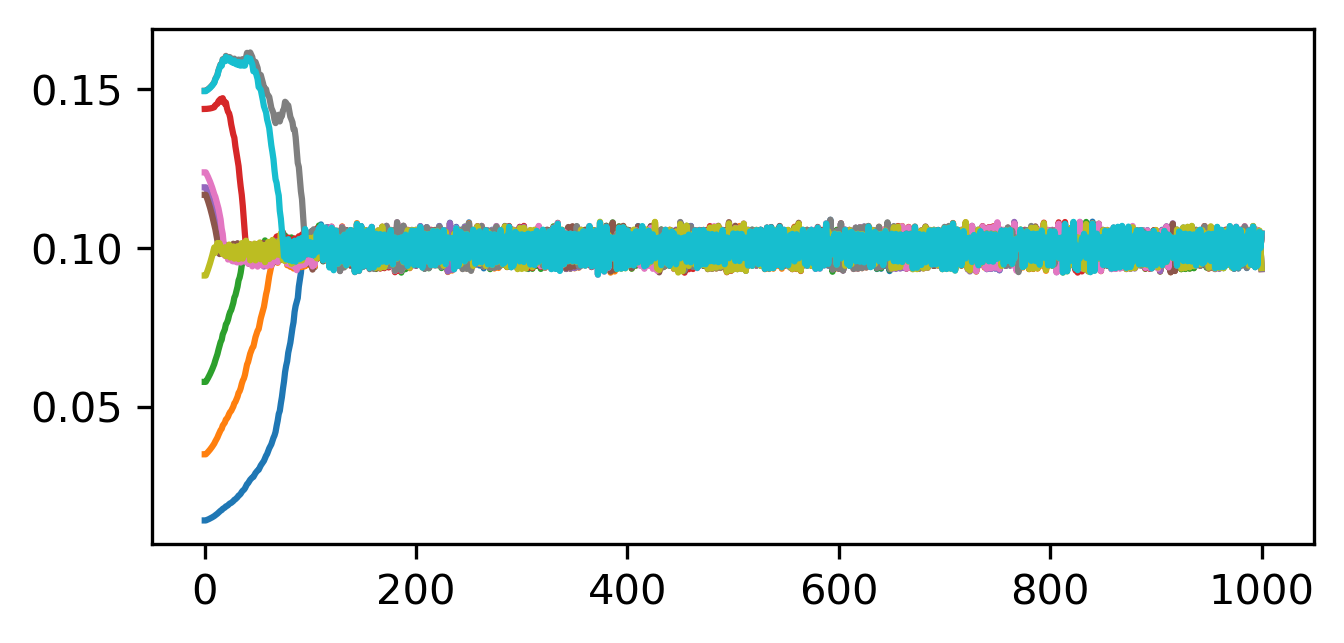

In [219]:
# fig,ax=plt.subplots(figsize=(5,5),dpi=300)
fig=plt.figure(figsize=(5,5),dpi=300)

Num=10
D=np.random.rand(Num)

max_x=np.where(D==np.max(D))
D[max_x]
min_x=np.where(D==np.min(D))

# ax.plot(D,'*')
# ax.scatter(max_x,D[max_x],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(max_x,D[max_x],marker="o",ms=100,c='none',markeredgecolor='red')
day=1000

Ds,Fs=factory_gen(D,Num,days=day,exp=1.0)
ax=fig.add_subplot(2,1,1)
Ds=Ds/Ds.sum(axis=1).reshape(Ds.shape[0],1)
# ax.plot(Ds[:,max_x[0]],'--')
ax.plot(Ds[:,:],'-')

# ax=fig.add_subplot(2,1,2)
# ax.plot(Ds[:,min_x[0]],'o')

plt.show()

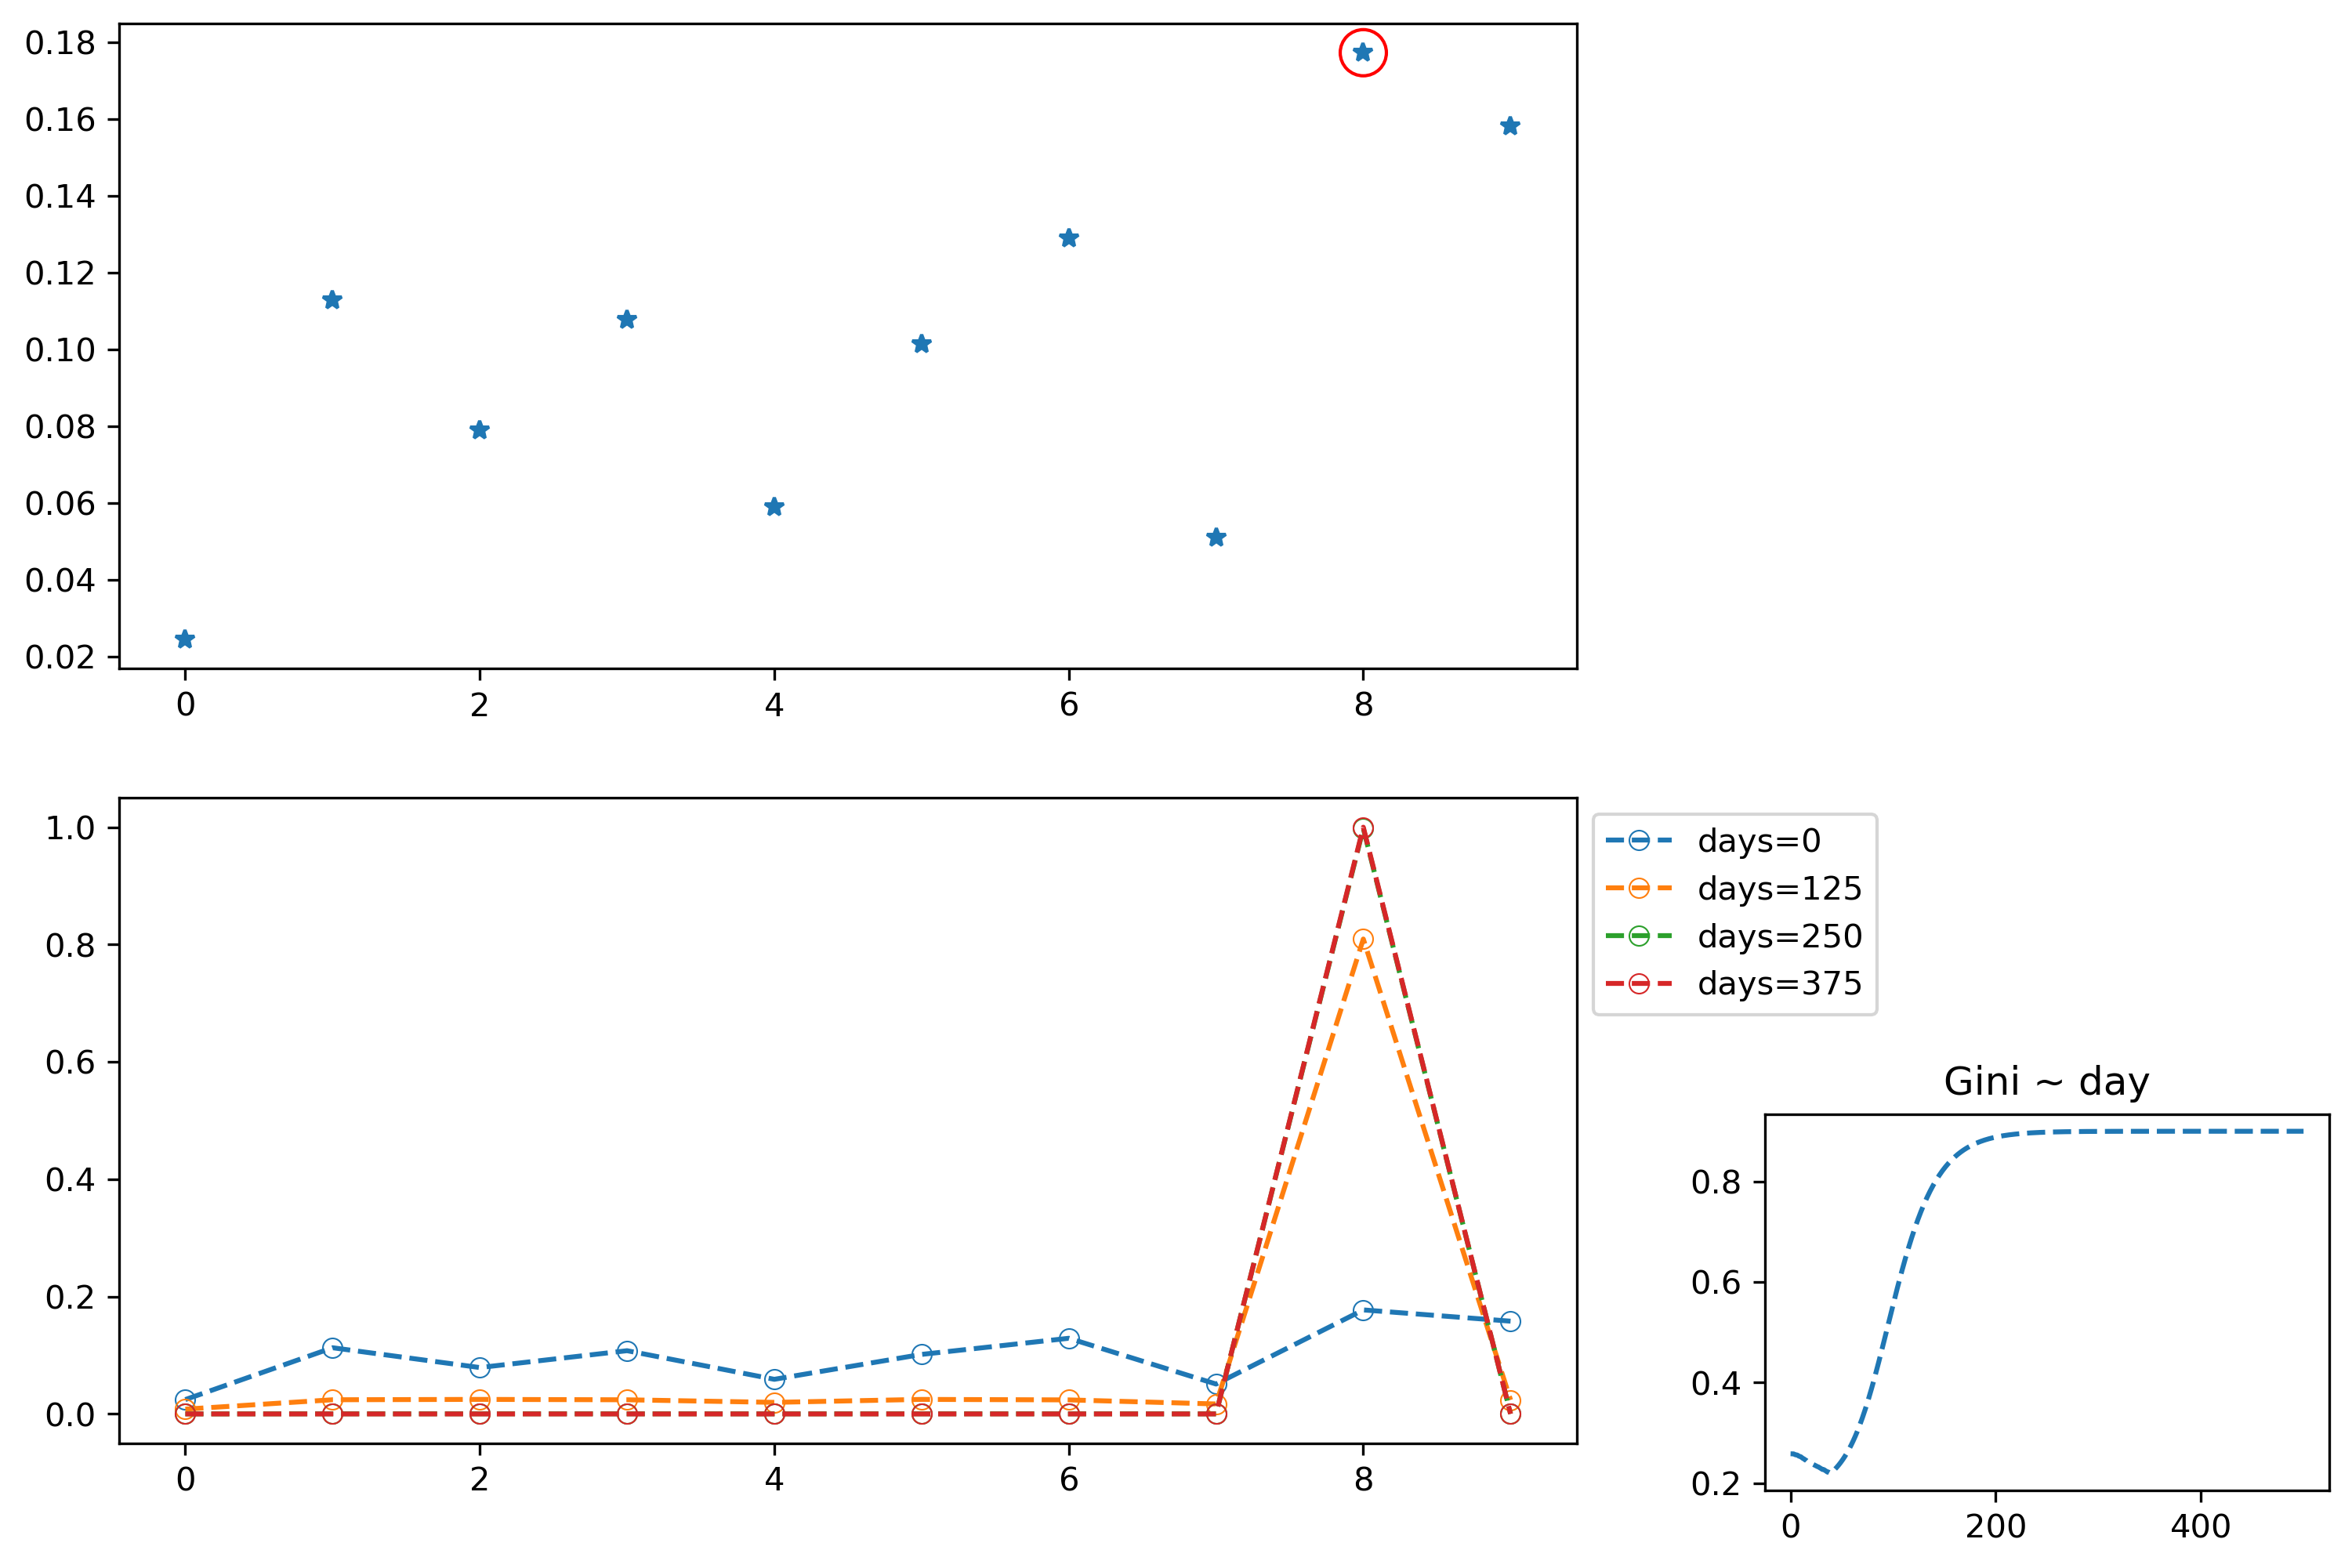

In [173]:
fig,axs=plt.subplots(2,1,figsize=(8,8),dpi=300)

Num=10
D=np.random.rand(Num)
D=D/D.sum()
max_x=np.where(D==np.max(D))
D[max_x]


ax=axs[0]
ax.plot(D,'*')
ax.scatter(max_x,D[max_x],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(max_x,D[max_x],marker="o",ms=100,c='none',markeredgecolor='red')

ax=axs[1]

days=500
# for day in [10,50,300,500]:
Ds,Fs=factory_gen(D,Num,days=days,exp=1.00)
for day in range(0,days,days//4):
    D=Ds[day,:]
    ax.plot(D/D.sum(),'--',label='days=%d'%day,marker='o',markerfacecolor='none',markeredgewidth=0.5)

ax.legend(loc='upper left',bbox_to_anchor=(1,1))
# ax.set_xbound([-1,20])

ax=fig.add_axes([1,0.1,0.3,0.2])
ginis=[gini(Ds[day,:]) for day in range(Ds.shape[0])]
ax.plot(ginis,'--')
ax.set_title("Gini ~ day")

plt.show()

### test

In [15]:
Num=1000
D=np.random.rand(Num)
D=D/D.sum()
Ds,Fs=factory_gen(D,Num,days=100,exp=1.5)

In [ ]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()
# for i in range(Ds.shape[1]):
#     ax.plot(Ds[:,i],'o--')

days=np.arange(Ds.shape[0])
ax.plot(days,Ds.sum(axis=1))

ax.plot(days,cal_an(Fs[0],Fs[1],Ds.shape[0]-2))
ax.plot(Fs)
ax.set_yscale("log")
plt.show()

In [17]:
x=np.linspace(0.01,1,100)
y=stats.powerlaw.pdf(x,0.66)
plr=stats.powerlaw.rvs(.66,size=10000)

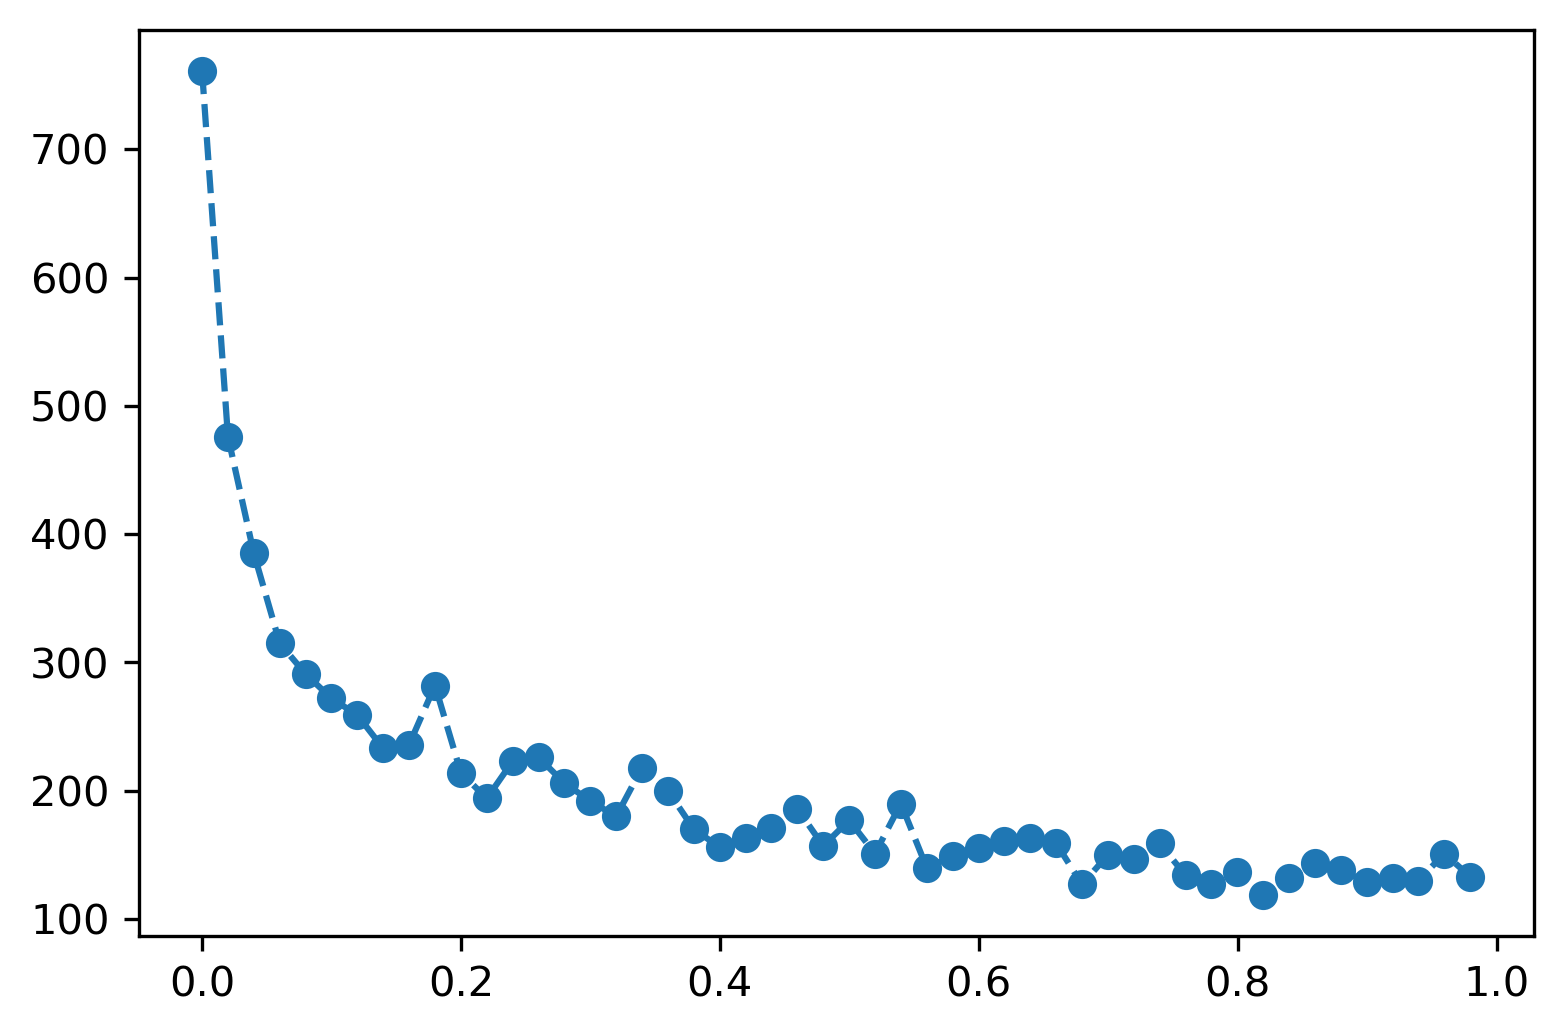

In [18]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()
ws=np.random.rand(20)
# ax.plot(wealth_cum(Ds[100]),'o--')
# ax.plot(np.linspace(0,1,len(plr)),wealth_cum(plr),'o--')
# ax.plot(wealth_cum(Ds[1,:]),'o--')
# ax.plot(wealth_cum(Ds[100,:]),'o--')
# ax.hist(Ds[10,:],bins=20)

# ax.hist(plr,bins=50)
fre,ns=np.histogram(plr,bins=50)
ax.plot(ns[:-1],fre,'o--')
# ax.plot(x,y)
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim(left=80)
# ax.set_xlim([0.005,1])
plt.show()

## Bouchaud Pyhsica A

[7.5, 0, 0.1]


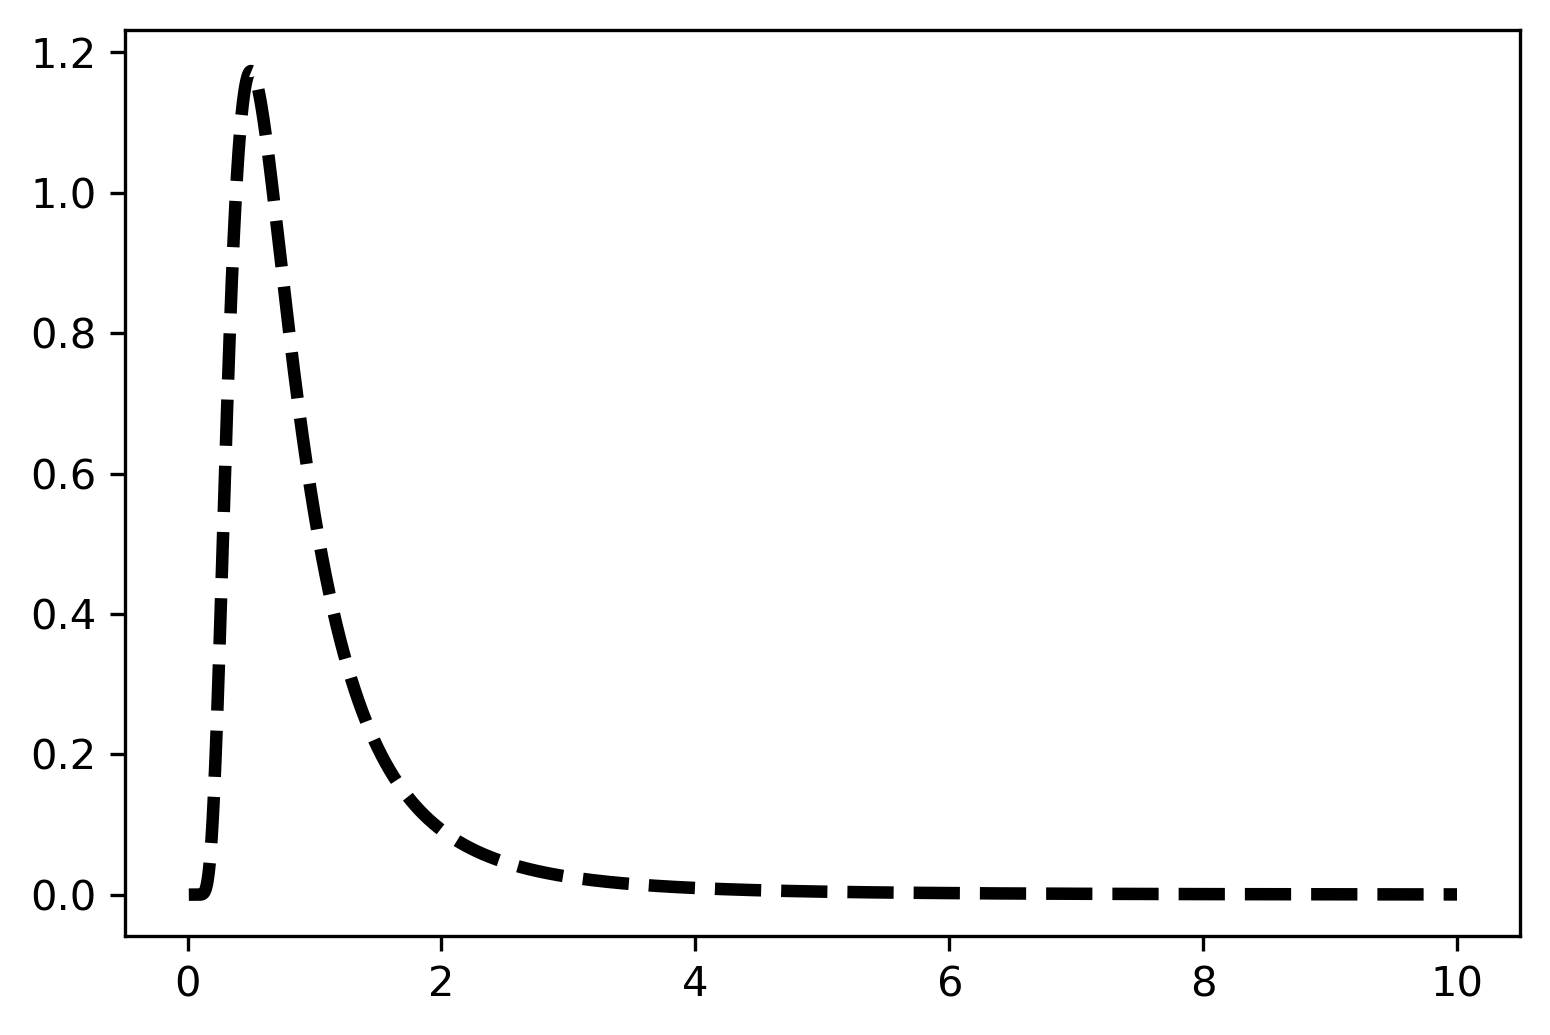

In [10]:
# paras=gamma.fit(data.flatten(),loc=0)
mu=7.5
paras=[mu,0,.1]
print(paras)

fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# w=np.arange(0.01,100,0.001)
# peq=np.exp(-w/paras[2])*w**(paras[0]-1)
# peq=peq/(peq*(w[1]-w[0])).sum()
# ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%mu)
# ax.set_xlim([0,5])

w=np.arange(0.01,10,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)
# ax.set_yscale("log")
# ax.set_xscale("log")

plt.show()

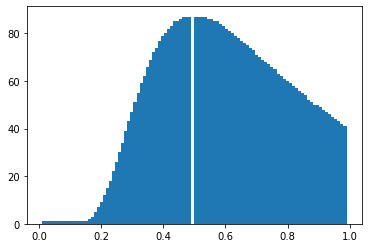

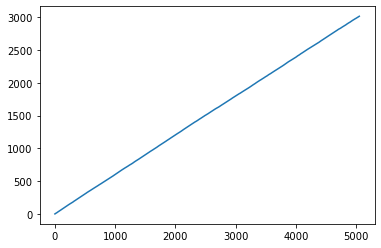

In [19]:
miu=3
# miu=0.5
w=np.arange(0.01,1,0.01)
ws=[]
for i in w:
    ws+=[np.exp(-(miu-1)/i)/i**(1+miu)]
    # ws.append(np.exp(-(miu-1)/i)/i**(1+miu))

ws=np.array(ws)/np.sum(ws)*5000
wii=[]

for i in range(len(w)):
    for j in range(int(ws[i]+1)):
        wii+=[w[i]]

plt.figure()
# plt.plot(np.cumsum(wii))
plt.hist(wii,bins=100)
plt.show()

np.random.shuffle(wii)
len(wii),np.cumsum(wii)
plt.figure()
plt.plot(np.cumsum(wii))
# plt.hist(wii,bins=100)
plt.show()


In [25]:
(peq*(w[1]-w[0])).sum()

0.2499996716219869

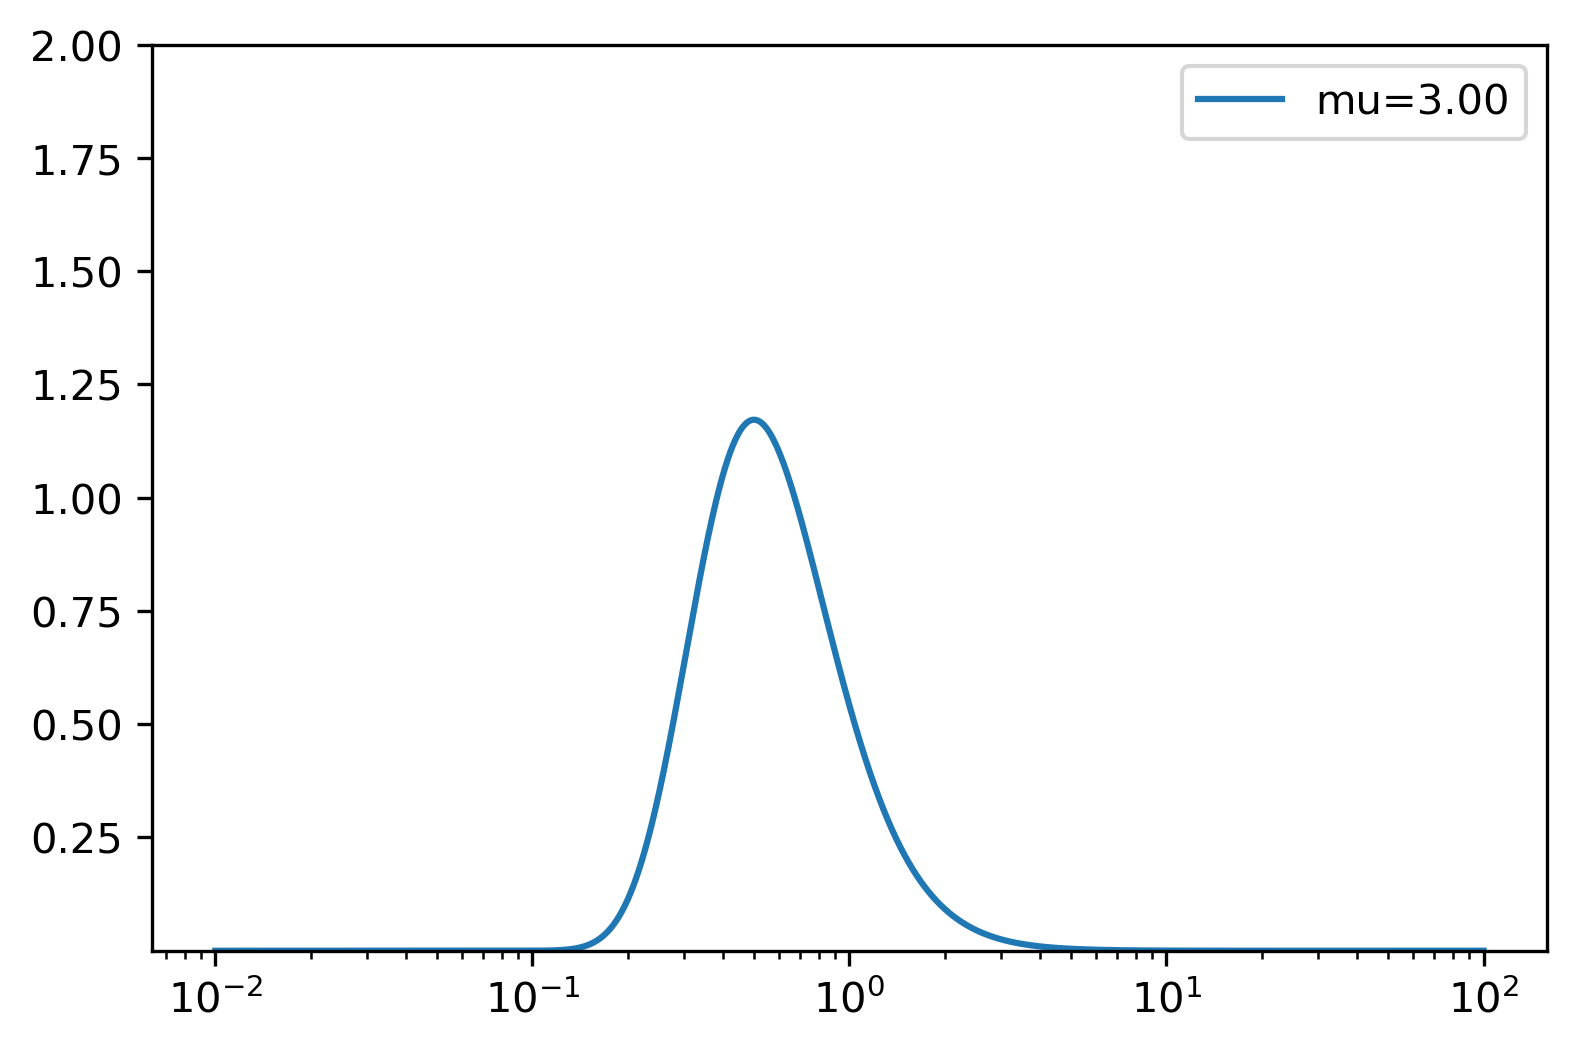

In [37]:
w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()

fig=plt.figure(dpi=300)
ax=fig.add_subplot()
ax.plot(w,peq,label="mu=%.2f"%miu)
# ax.hist(peq,bins=100)
ax.set_ylim([1e-5,2])
ax.set_xscale("log")
# ax.set_yscale("log")
ax.legend()
plt.show()


## PNAS 2017

In [21]:
def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [22]:
ws = np.ones(10000)
s = 1e-5
ginis = []
allweath=[]
for t in range(2000):
    ri = np.random.normal(0.05, 0.05, size=len(ws))
    ut = (s*len(ws)+(ri*ws).sum())/(ws.sum())
    ws = ws + ri*ws +s-ut * ws - 0.05 * ws ** 2
    if t % 50 == 0:
        # print("sum=%.1f,max=%.1f,min=%.1f,gini=%.1f"%(ws.sum(),ws.max(),ws.min(),gini(ws)),end='\t')
        allweath += [ws]
        ginis += [gini(ws)]
aw=np.array(allweath)


In [23]:
aw.mean(axis=0)

array([0.05451895, 0.05225111, 0.07009074, ..., 0.04677742, 0.05359579,
       0.05239233])

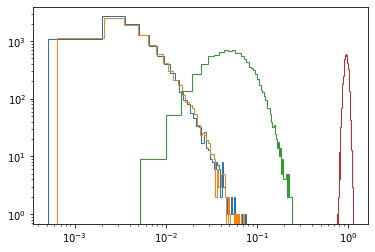

In [24]:
plt.figure()
# plt.plot(ws,'o-')
plt.hist(ws,bins=50,histtype='step')
plt.hist(aw[-1,:],bins=50,histtype='step')
plt.hist(aw[-35,:],bins=50,histtype='step')
plt.hist(aw[-40,:],bins=50,histtype='step')
# plt.hist(aw[-20,:],bins=50)
plt.yscale('log')
plt.xscale('log')
plt.show()


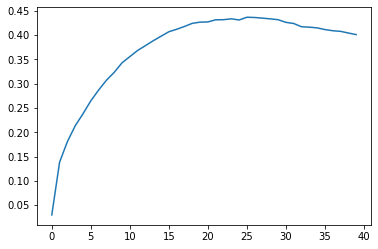

In [25]:
fig, ax = plt.subplots()
ax.plot(ginis)

plt.show()


## RE

## multiplicative noise

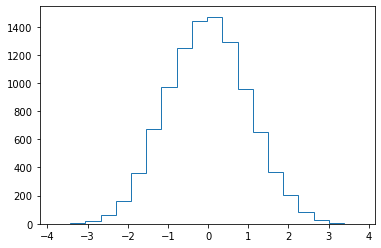

In [ ]:
noise=np.random.normal(0,1,size=10000)
fig=plt.figure()
ax=fig.add_subplot()
ax.hist(noise,bins=20,histtype='step')
plt.show()

In [ ]:
x = np.ones(int(1e5))
xs = [x.mean()]
xm = np.ones(len(x))
xsm = [x.mean()]
dt=0.0001
for i in range(20000):
    # noise=np.random.normal(1, 1, size=len(x))
    # x = x *noise
    # xs.append(x.mean())
    noise=np.random.normal(0, 1, size=len(x))
    dx = x*noise*dt**0.5# + 0.5*x*(noise**2*dt-dt**2)
    dxm = xm*noise*dt**0.5 + 0.5*xm*(noise**2-1)*dt
    x += dx
    xm += dxm
    xs.append(x.mean())
    xsm.append(xm.mean())
    # print(dx.mean(),end='\t')


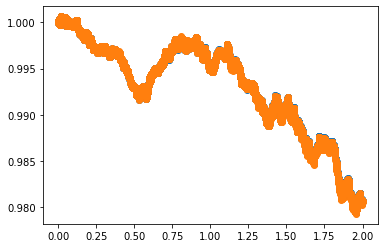

In [ ]:
fig=plt.figure()
ax=fig.add_subplot()
# ax.hist(x,bins=np.linspace(-0,2,1000))
# ax.hist(x)
ax.plot(np.arange(len(xs))*0.0001,xs,'o--')
ax.plot(np.arange(len(xsm))*0.0001,xsm,'o--')
# ax.set_ylim([-1,1])
# ax.set_yscale("log")
plt.show()

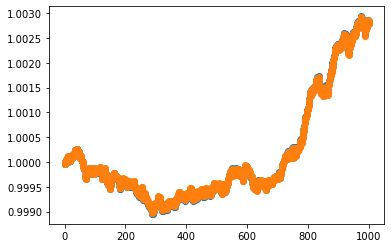

In [ ]:
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(np.arange(len(xs)),xs,'o--')
ax.plot(np.arange(len(xsm)),xsm,'o--')
# ax.set_ylim([0,2])
plt.show()